# Encontro 06

## Materiais de apoio:

* The Scientist and Engineer's Guide to Digital Signal Processing, de By Steven W. Smith, Ph.D. (capítulos 23 até 25)
	* Disponível em http://www.dspguide.com

## Tópicos Abordados:

* Processamento de Imagem em Python:
  * Pacote ndimage do SciPy;
  * Exibição de imagens no ambiente Google Colab;
  * Importação e exportação de imagens PNG;
  * Histograma de imagem.

* Conceitos de processamento de Imagem:
  * Objetivo e usos;
  * Características da visão humana;
  * Captação de imagem por CCD;
  * Codificação de imagem digital;
  * Luminosidade e contraste.

* Exemplo de aplicação:
  * Conversão de RBG para Grayscale;
  * Espelhamento de imagem (vertical);
  * Espelhamento de imagem (horizontal);
  * Rotação de imagem;
  * Corte (crop) de imagem;
  * Inversão de cores de imagem;
  * Criação de imagem borrada (aplicação de filtro gaussiano);
  * Detecção de bordas em imagem (aplicação de filtro sobel);
  * Ajuste de brilho de imagem;
  * Ajuste de contraste de imagem;
  * Redimensionamento de imagens.



In [1]:
# Importação de módulos e instalação de bibliotecas adicionais

# Importação do pacote matématico Math
import math

# Importação do pacote Pandas
import pandas as pd

# Importação dos pacotes NumPy e SciPy
import numpy as np
from scipy.interpolate import interp1d, interp2d
from scipy import signal, misc, ndimage

# Importação do pacote librosa e alguns componentes
import librosa
import librosa.display

# Importação do pacote SoundFile
!pip install soundfile
import soundfile as sf

# Importação do pacote Padasip
!pip install padasip
import padasip as pa

# Importação do pacote IPython.display
import IPython.display as ipd

# Importação de Widgets
import ipywidgets as widgets

# Importação do pacote PyPlot do MatPlotLib
import matplotlib.pyplot as plt

# Instalação e importação do pacote mpld3
!pip install mpld3
import mpld3

# importação do módulo timeit
import timeit

  Created wheel for padasip: filename=padasip-1.1.1-cp36-none-any.whl size=52974 sha256=c60200a7d8e4f09e273cd96697af44c5c6670ae90f5b3cc7884642dd3d8975be
  Stored in directory: /root/.cache/pip/wheels/64/33/7b/3fe5f0377cb1d58f8f565dc0e718ae80767f8f563e6a77f1ac
Successfully built padasip
     |████████████████████████████████| 1.0MB 2.9MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.1-cp36-none-any.whl size=364064 sha256=25d9ad0ae86c3fdc271966f84a4386eedb41d1139d6e45ca6866f91fbe297d42
  Stored in directory: /root/.cache/pip/wheels/38/68/06/d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


In [2]:
# Diretiva do Notebook para exibição de gráficos inline
%matplotlib inline

# Configuração do tamanho dos gráficos
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
# Importação de dados do Google Drive

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

filepath = 'My Drive/Colab Notebooks/pae_maua/encontro_06/'

Mounted at /gdrive
/gdrive


## Processamento de Imagem em Python

### Pacote ndimage do SciPy
O pacote `ndimage` do `SciPy` possui diversas funções para processamento multidimensional de imagens. Sua documentação está disponível em: https://docs.scipy.org/doc/scipy/reference/ndimage.html

### Exibição de imagens no ambiente Google Colab

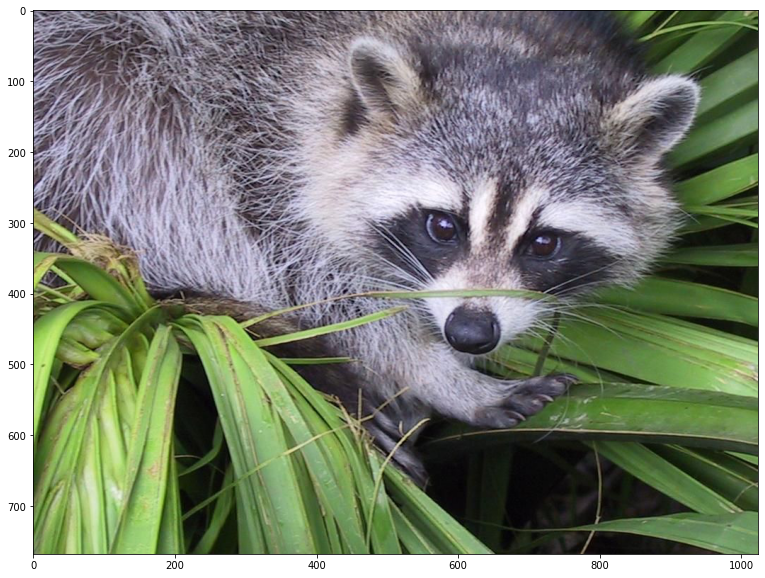

In [ ]:
# Exibição de imagens Coloridas no ambiente Google Colab

# Importa uma imagem de exemplo do misc
image_face = misc.face()

# Exibe a imagem pelo MatPlotLib
plt.imshow(image_face)

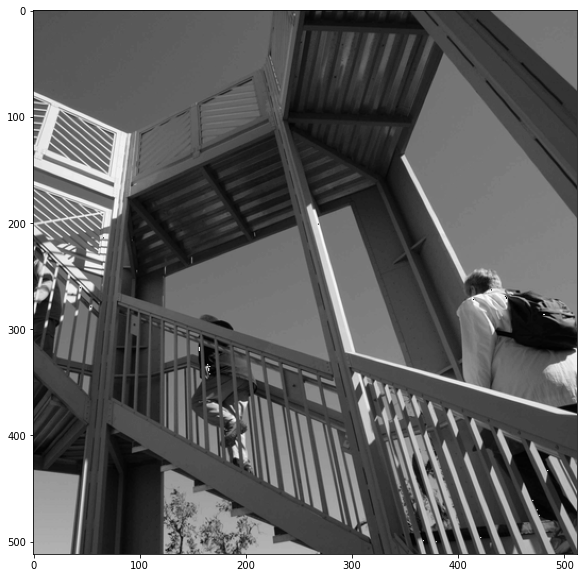

In [ ]:
# Exibição de imagens em Escala de Cinza no ambiente Google Colab

# Importa uma imagem de exemplo do misc
image_ascent = misc.ascent()

# Exibe a imagem pelo MatPlotLib
plt.imshow(image_ascent, cmap="gray")

### Importação e exportação de imagens PNG

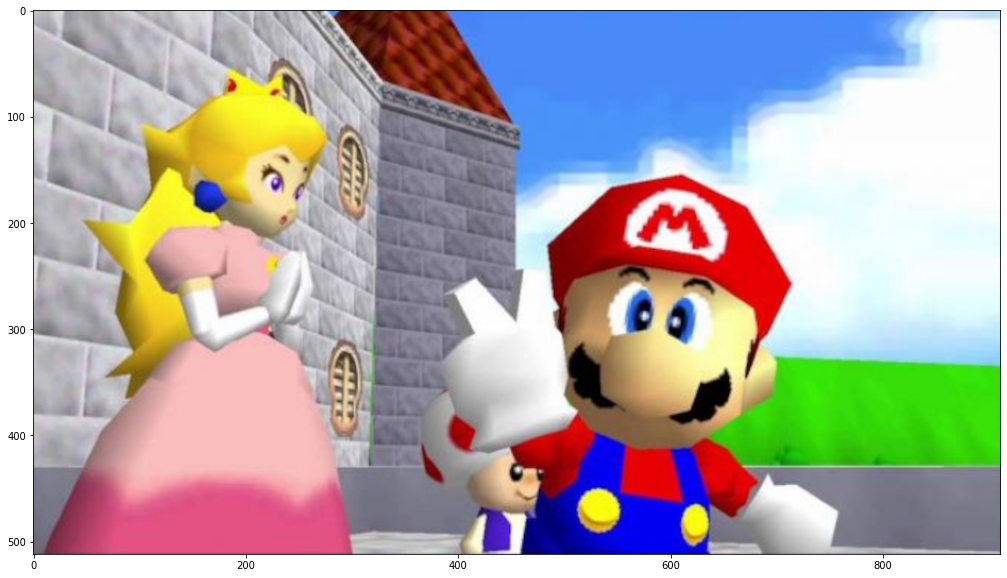

In [4]:
# Importação de imagens PNG

# Criação da imagem
mario_image = plt.imread(filepath + 'SuperMario64.png')

# Exibe a imagem pelo MatPlotLib
plt.imshow(mario_image)

In [ ]:
# Exportação de imagens PNG
plt.imsave(filepath + 'misc_face.png', image_face, format='png')
plt.imsave(filepath + 'misc_ascent.png', image_ascent, format='png', cmap="gray")

### Histograma de imagem
Uma informação útil de imagens é o histograma dos canais de uma imagem (canais de cor ou escala de cinza). O histograma permite visualizar com facilidade qual a concentração de diferentes cores ou intensidades na imagem.

In [ ]:
# Geração de um histograma das cores da imagem

# Configurações do histograma
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)
bins_num = 256

# Criação da figura
fig = plt.figure()

# Cálculo do histograma de cada cor
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(image_face[:, :, channel_id]/255, bins=bins_num, range=(0, 1))
    plt.plot(bin_edges[0:-1], histogram, color=c)

# Configuração de exibição do gráfico
plt.xlim([0, 1])
plt.title("Histograma de Cores da Imagem")
plt.xlabel("Intensidade da Cor")
plt.ylabel("Quantidade de Pixels")

# Criação e exibição de tooltips no gráfico
mpld3.plugins.connect(fig, mpld3.plugins.MousePosition(fontsize=14))
mpld3.display()

In [ ]:
# Geração de um histograma de imagem em escala de cinza

# Configurações do histograma
colors = ("k")
bins_num = 256

# Criação da figura
fig = plt.figure()

# Cálculo do histograma de cada cor
histogram, bin_edges = np.histogram(image_ascent/255, bins=bins_num, range=(0, 1))
plt.plot(bin_edges[0:-1], histogram, color=colors)

# Configuração de exibição do gráfico
plt.xlim([0, 1])
plt.title("Histograma de Imagem em Escala de Cinza")
plt.xlabel("Intensidade do Cinza")
plt.ylabel("Quantidade de Pixels")

# Criação e exibição de tooltips no gráfico
mpld3.plugins.connect(fig, mpld3.plugins.MousePosition(fontsize=14))
mpld3.display()

## Conceitos de processamento de Imagem

### Objetivo e usos
O Processamento de Imagem pode ser definido como um conjunto de técnicas que busca entender e manipular imagens. É uma das classes mais importantes de Processamento de Sinais.

De uma maneira ampla, uma imagem pode ser definida como um sinal espacial bidimensional. Ou seja, qualquer sinal espacial (definido em função do espaço) descrito em duas dimensões (usualmente largura e altura) pode ser considerado como uma imagem. Essa definição é importante porque uma imagem não precisa apenas ser uma informação de cores (como uma fotografia) mas também informações como mapas de calor (temperatura distribuída no espaço) ou mapas topológicos (altura distribuída no espaço).

O Processamento de Imagem é uma classe gigantesca do Processamento de Sinais e não será tratada por completo nesse material. Existem livros e cursos inteiros dedicados ao assunto.

### Características da visão humana

A visão humana possui grande captação dinâmica, sendo capaz de detectar formas e movimentos mesmo em ambientes com pouca luz, além de permitir entender imagens mesmo com baixas relações de sinal/ruído. É um dos sentidos humanos mais úteis para exploração do mundo e é a principal maneira como entendemos a natureza.

Quando uma fonte de luz ilumina um objeto qualquer, esse objeto absorve determinados comprimentos de ondas e reflete o resto da luz de volta. A luz refletida é captada pelo olho e processada pelo cérebro para gerar a visão humana.

O olho humano possui estruturas chamadas cones capazes de captar cores. Temos três tipos de cones, especializados em:
* Captar luz de comprimentos de onda longos (centrado aproximadamente na cor vermelha);
* Captar luz de comprimentos de onda médio (centrado aproximadamente na cor verde);
* Captar luz de comprimentos de onda curtos (centrado aproximadamente na cor azul).

Comprimentos de luz mais longos e mais curtos do que o que olho humano consegue captar são denominados de infravermelho e ultravioleta, respectivamente. 

Outra estrutura do olho humano são os bastonetes, capazes de captar luminosidade. Os bastonetes permitem enxergarmos formas mesmo em ambientes escuros.

Para manter um foco constante, o olho e o cérebro humano estão constantemente se ajustando, realizando tanto ajustes mecânicos quanto ajustes se sensibilidade.

Na figura abaixo temos um exemplo do espectro de ondas conhecidos, incluindo o espectro de luz visível.


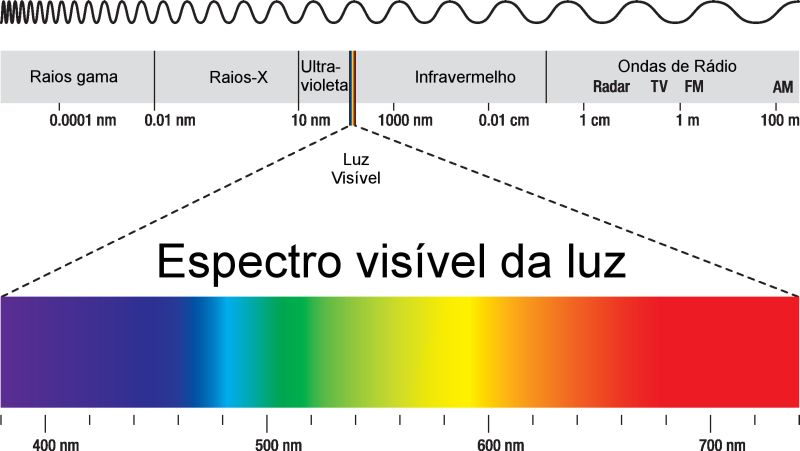

### Captação de imagem por CCD

A forma mais comum de captação de imagens digitais se dá através de um dispositivo eletrônico denominado Dispositivo de Carga Acoplada (Charge-Coupled Device ou CCD). Um CCD é um dispositivo eletrônico capaz de armazenar fótons (luz) na forma de cargas elétricas. Podemos converter essas cargas para sinais digitais (através de um ADC) e obtemos assim uma representação digital da luz.

CCDs funcionam através de um sistema de captação de cargas em poços, cada poço representando um pixel da imagem. A captação de cargas ocorre durante um período de integração, que depende, entre outros fatores, da quantidade de luz que se deseja captar. Uma vez que o período de integração termina, as cargas acumuladas no CCD são transferidas pelo CCD até chegarem ao conversor ADC. Essa transferência de cargas é completamente analógica e ocorre coluna a coluna e linha a linha.

De maneira simplificada, um CCD tem L x C pixels, mas apenas um ou dois ADCs. Isso é possível pois o mecanismo de transferência de cargas serializa esses L x C pixels, de maneira que o ADC converte sequencialmente um pixel por vez. Usualmente essa conversão ocorre de linha em linha.

### Codificação de imagem digital

O armazenamento de imagens normalmente é realizado em matrizes bidimensionais, representando altura e largura da imagem. No entanto, o significado exato de cada valor dessa tabela é muito dependente da aplicação escolhida. Os dados resultantes de um mapa de calor e de um mapa topográfico são completamente diferentes, tanto em significado quanto em valores.

No entanto, podemos generalizar uma imagem colorida como a combinação das três cores que os cones do olho humano são capazes de captar. Ou seja, qualquer cor visível pelo olho humano pode ser descrita pela combinação linear dessas três cores. Baseado nisso, temos a forma mais comum de armazenar imagens digitalmente, que é a codificação RGB.

A codificação RGB armazena três matrizes bidimensionais do mesmo tamanho, cada uma definindo intensidade das cores vermelha (R), verde (G) e azul (B) que compõem cada pixel da imagem. A intensidade das cores é definida como indo de ausência total até saturação da cor. Se tivermos a ausência das três cores, obtemos preto. Por outro lado, se temos a saturação das três cores, obtemos o branco. Qualquer outra cor visível será dada como uma função linear dessas três cores.

Case seja necessário ter uma imagem com transparência, podemos adicionar um quarto canal de cor, o canal alfa. O canal alfa define para cada pixel a opacidade ou transparência dele, variando de completamente transparente para completamente opaco. Case esse canal seja adicionado, temos a codificação RGBA.

Também é possível armazenar uma imagem colorida na codificação HSV (hue, saturation e value), que armazena a informação de um pixel em função de sua matiz (tonalidade), sua saturação e seu valor (brilho). Essa codificação se aproxima da maneira como humanos percebem atributos geradores de cores.

Outra codificação comum para imagens que não necessitam de cores é a codificação em escala de cinza, ou Grayscale. Nessa codificação, existe apenas um canal de cor, que varia do preto (ausência de cor) para o branco (saturação da cor) em escalas de cinza. Essa codificação é interessante para armazenamento de imagens monocromáticas ou de informações puras (como mapas de calor).

In [ ]:
# Seleção da intensidade dos canais de cor (RGBA)

# Cria sliders para seleção do ganho de cada canal de cor e transparência
red_channel_gain = widgets.IntSlider(value=127, min=0, max=255, step=1, description='Ganho R')
green_channel_gain = widgets.IntSlider(value=127, min=0, max=255, step=1, description='Ganho G')
blue_channel_gain = widgets.IntSlider(value=127, min=0, max=255, step=1, description='Ganho B')
alpha_channel_gain = widgets.IntSlider(value=127, min=0, max=255, step=1, description='Ganho A')

# Exibe os sliders de cada canal de cor e transparência
display(red_channel_gain)
display(green_channel_gain)
display(blue_channel_gain)
display(alpha_channel_gain)

IntSlider(value=127, description='Ganho R', max=255)

IntSlider(value=127, description='Ganho G', max=255)

IntSlider(value=127, description='Ganho B', max=255)

IntSlider(value=127, description='Ganho A', max=255)

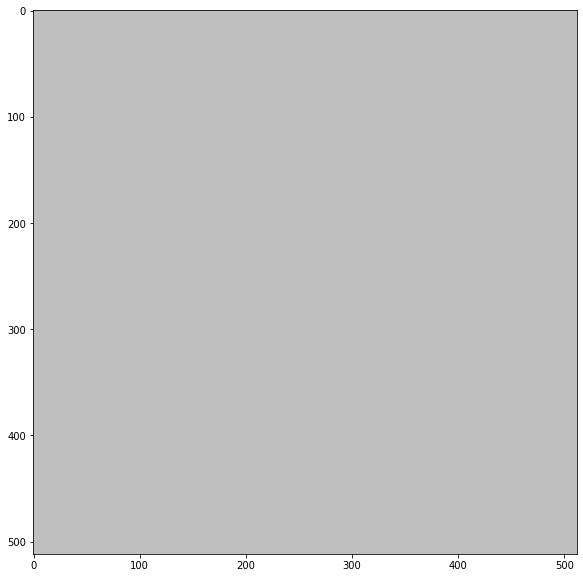

In [ ]:
# Demonstração da codificação RGBA

# Parâmetros da imagem
largura = 512
altura = 512

# Criação dos canais de cor e transparência
red_channel = red_channel_gain.value * np.ones((altura, largura), dtype=int)
green_channel = green_channel_gain.value * np.ones((altura, largura), dtype=int)
blue_channel = blue_channel_gain.value * np.ones((altura, largura), dtype=int)
alpha_channel = alpha_channel_gain.value * np.ones((altura, largura), dtype=int)

# Criação da imagem
color_image = np.dstack((red_channel, green_channel, blue_channel, alpha_channel))

# Exibe a imagem pelo MatPlotLib
plt.imshow(color_image)

### Brilho e contraste

Dois atributos comuns de qualquer imagem são seu brilho e seu contraste. Atrelados a composição da imagem, uma imagem deve ter brilho e contraste apropriados para ser visualizada com facilidade. 

Brilho se refere a luminosidade ou escuridão global da imagem. Uma imagem com maior brilho se aproxima da cor branco enquanto com menor brilho se aproxima da cor preto.

Contraste é a diferença de brilho entre objetos ou regiões. Por exemplo, um coelho branco correndo em um campo nevado tem baixo contraste, enquanto um cachorro preto no mesmo cenário branco tem alto contraste.

Podemos ver o efeito de diferentes níveis de brilho e contraste na imagem abaixo. Essencialmente, precisamos de uma imagem com brilho e contraste equilibrado para conseguir ver apropriadamente ela.


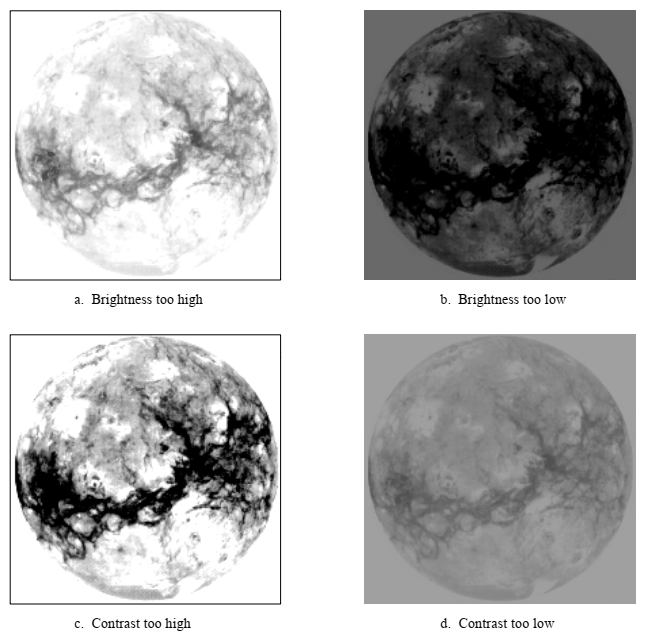

## Exemplo de aplicação


### Conversão de RBG para Grayscale

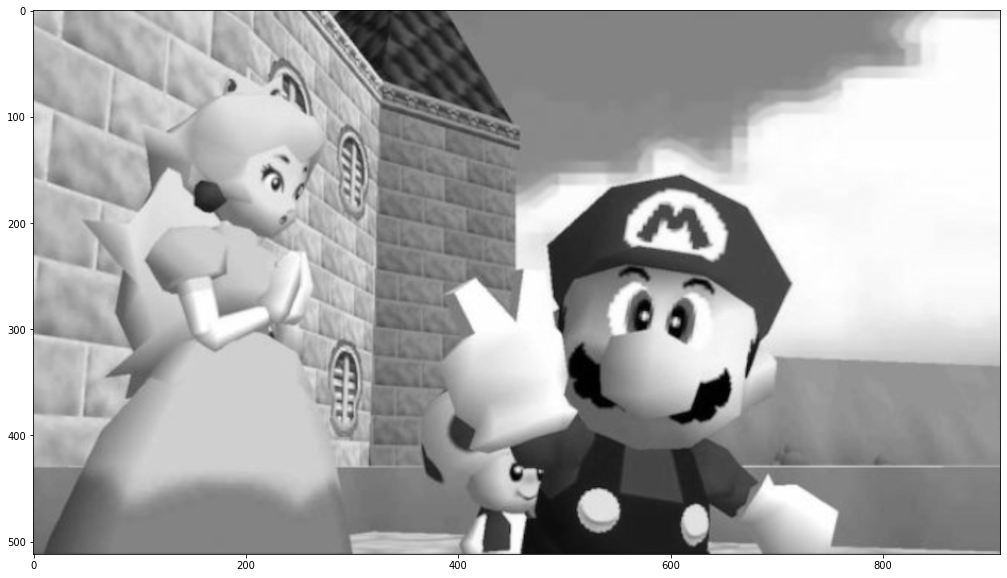

In [ ]:
# Conversão de RGB para Grayscale

# Conversão para escala de cinza
grayscale_gains = [0.2989, 0.5870, 0.1140]
grayscale_mario_image = np.clip(np.dot(mario_image[...,:3], grayscale_gains), a_min=0, a_max=1)

# Exibe a imagem pelo MatPlotLib
plt.imshow(grayscale_mario_image, cmap='gray')

### Espelhamento de imagem (vertical)

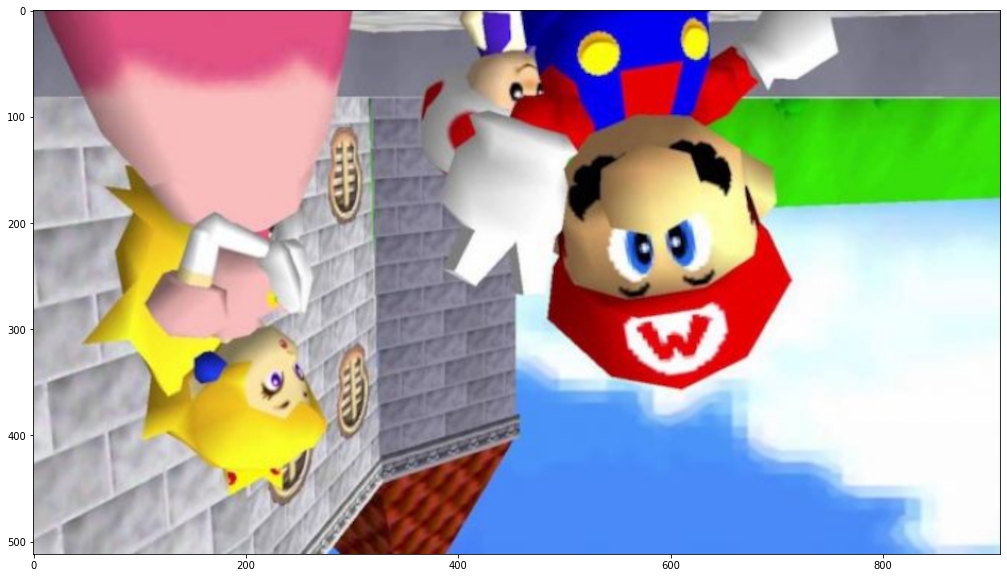

In [ ]:
# Espelhamento de imagem (vertical)

# Execução da transformação
vflipped_mario_image = np.flipud(mario_image)

# Exibe a imagem pelo MatPlotLib
plt.imshow(vflipped_mario_image)

### Espelhamento de imagem (horizontal)

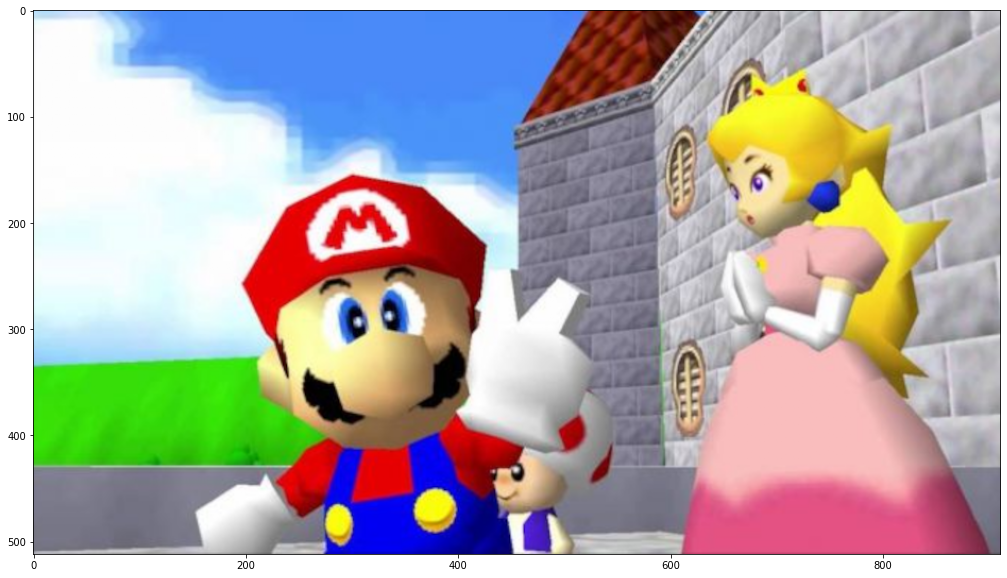

In [ ]:
# Espelhamento de imagem (horizontal)

# Execução da transformação
hflipped_mario_image = np.fliplr(mario_image)

# Exibe a imagem pelo MatPlotLib
plt.imshow(hflipped_mario_image)

### Rotação de imagem

In [ ]:
# Seleção do ângulo de rotação da imagem

# Cria sliders para seleção do ângulo de rotação da imagem
rotated_angle = widgets.IntSlider(value=0, min=0, max=360, step=1, description='Ângulo')

# Exibe os sliders do ângulo de rotação da imagem
display(rotated_angle)

IntSlider(value=0, description='Ângulo', max=360)

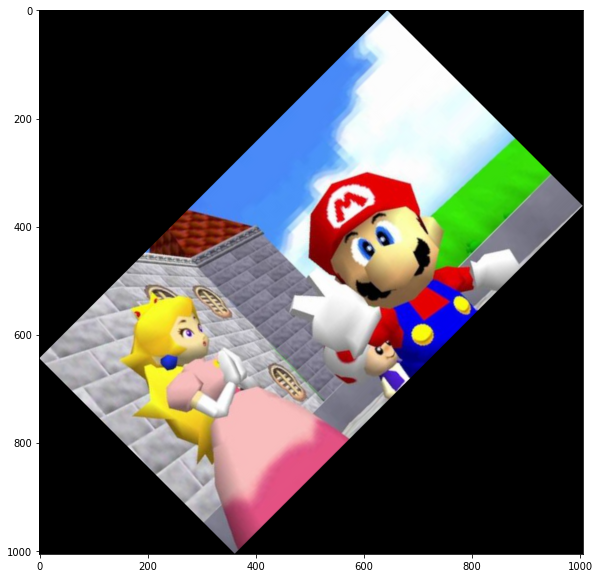

In [ ]:
# Rotação de imagem

# Execução da transformação
rotated_mario_image = np.clip(ndimage.rotate(mario_image, rotated_angle.value), a_min = 0, a_max = 1)

# Exibe a imagem pelo MatPlotLib
plt.imshow(rotated_mario_image)

### Corte (crop) de imagem

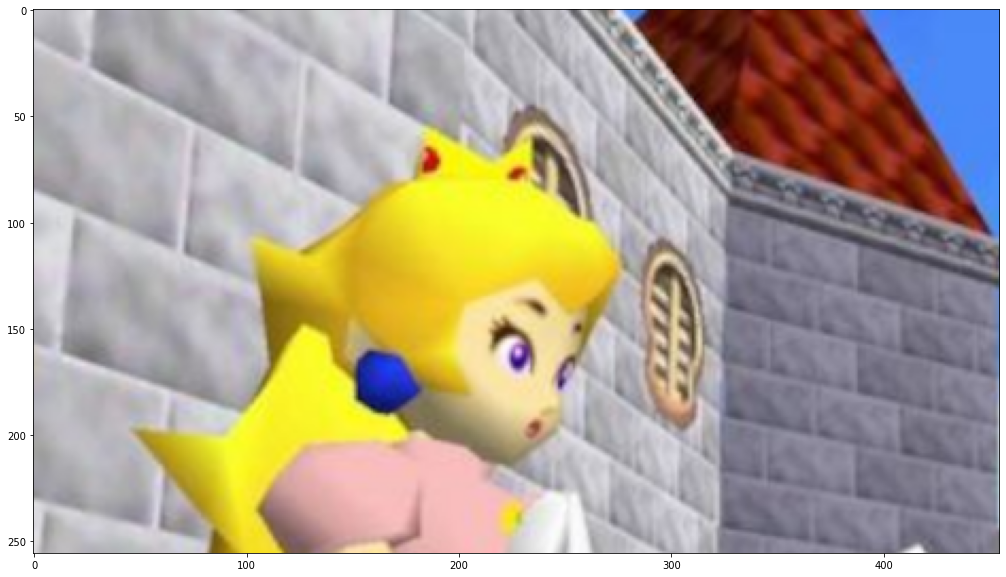

In [ ]:
# Corte de imagem

# Execução da transformação
cropped_mario_image = mario_image[0:256, 0:455]

# Exibe a imagem pelo MatPlotLib
plt.imshow(cropped_mario_image)

###Inversão de cores de imagem

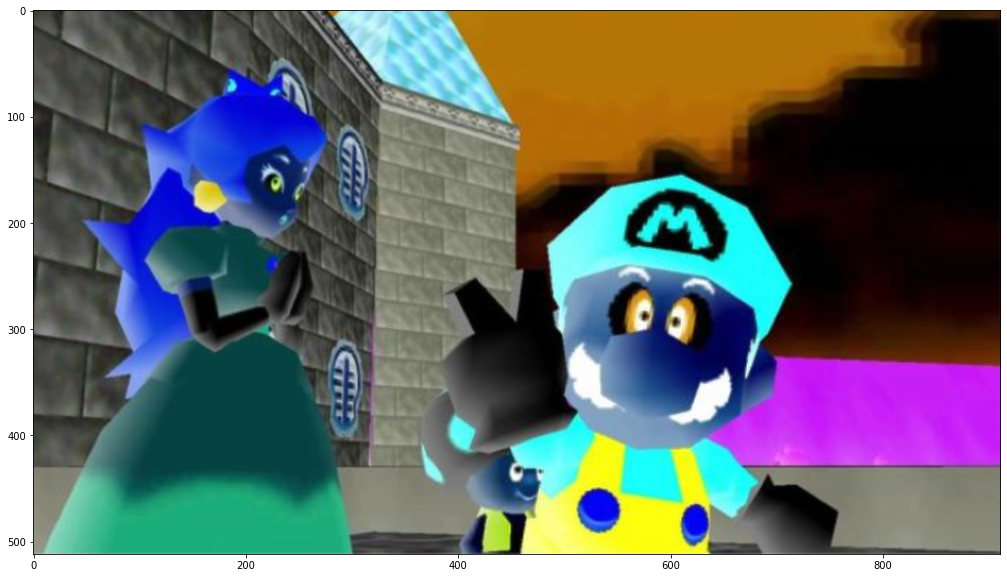

In [6]:
# inversão de cores de imagem

# Execução da transformação
inverted_mario_image = np.ones((np.size(mario_image, axis=1), np.size(mario_image, axis=2))) - mario_image

# Exibe a imagem pelo MatPlotLib
plt.imshow(inverted_mario_image)

### Criação de imagem borrada (aplicação de filtro gaussiano)

In [ ]:
# Seleção da intensidade da imagem borrada

# Cria sliders para seleção do sigma do ajuste da imagem borrada
blurred_sigma = widgets.IntSlider(value=0, min=0, max=31, step=1, description='Sigma')

# Exibe os sliders do ajuste da imagem borrada
display(blurred_sigma)

IntSlider(value=0, description='Sigma', max=31)

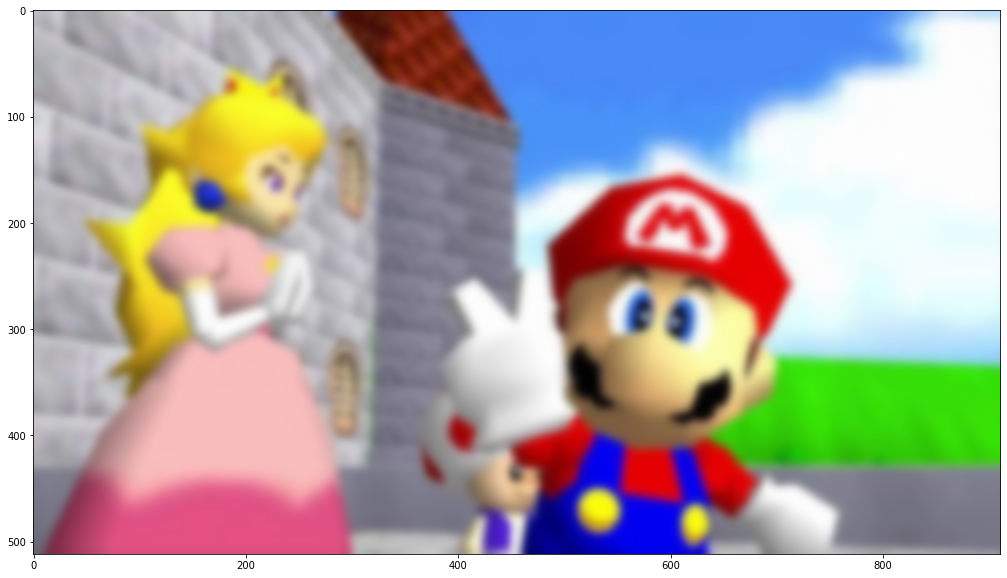

In [ ]:
# Criação de imagem borrada

# Execução da transformação nos canais de cor
blurred_mario_image_red = ndimage.gaussian_filter(mario_image[:, :, 0], blurred_sigma.value)
blurred_mario_image_green = ndimage.gaussian_filter(mario_image[:, :, 1], blurred_sigma.value)
blurred_mario_image_blue = ndimage.gaussian_filter(mario_image[:, :, 2], blurred_sigma.value)

# Criação da imagem
blurred_mario_image = np.dstack((blurred_mario_image_red, blurred_mario_image_green, blurred_mario_image_blue))

# Exibe a imagem pelo MatPlotLib
plt.imshow(blurred_mario_image)

### Detecção de bordas em imagem (aplicação de filtro sobel)

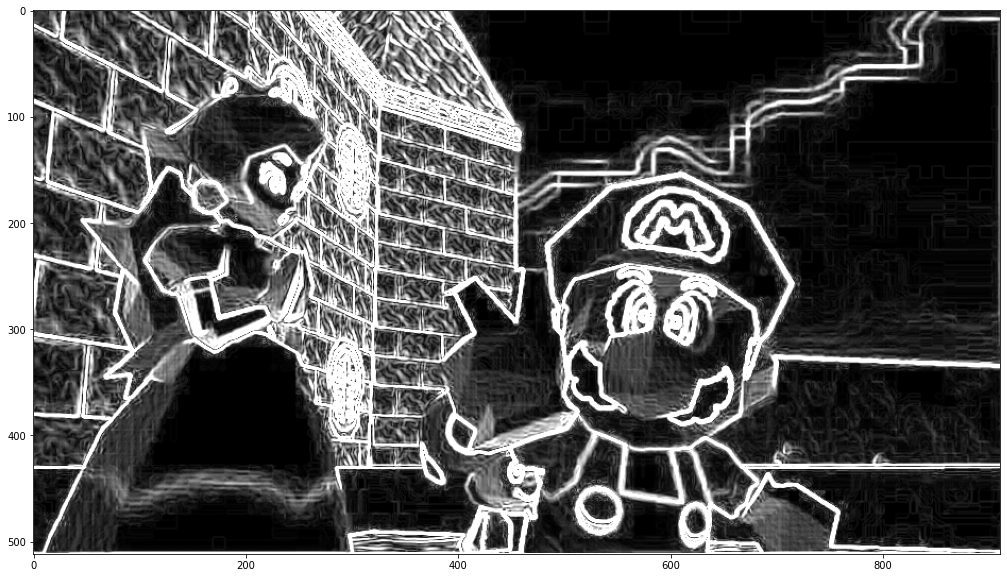

In [ ]:
# Detecção de bordas em imagem

# Aplicação do filtro de sobel
edge_x_mario_image = ndimage.sobel(mario_image, axis=0, mode='constant')
edge_y_mario_image = ndimage.sobel(mario_image, axis=1, mode='constant')
edge_mario_image = np.hypot(edge_x_mario_image, edge_y_mario_image)

# Conversão para escala de cinza
grayscale_gains = [0.2989, 0.5870, 0.1140]
edge_grayscale_mario_image = np.clip(np.dot(edge_mario_image[...,:3], grayscale_gains), a_min=0, a_max=1)

# Exibe a imagem pelo MatPlotLib
plt.imshow(edge_grayscale_mario_image, cmap='gray')

### Ajuste de brilho de imagem

In [ ]:
# Seleção da intensidade do ajuste de brilho

# Cria sliders para seleção do ganho do ajuste de brilho
brightness_gain = widgets.FloatSlider(value=0, min=-1.0, max=1.0, step=0.05, description='Brilho')

# Exibe os sliders do ajuste de brilho
display(brightness_gain)

FloatSlider(value=0.0, description='Brilho', max=1.0, min=-1.0, step=0.05)

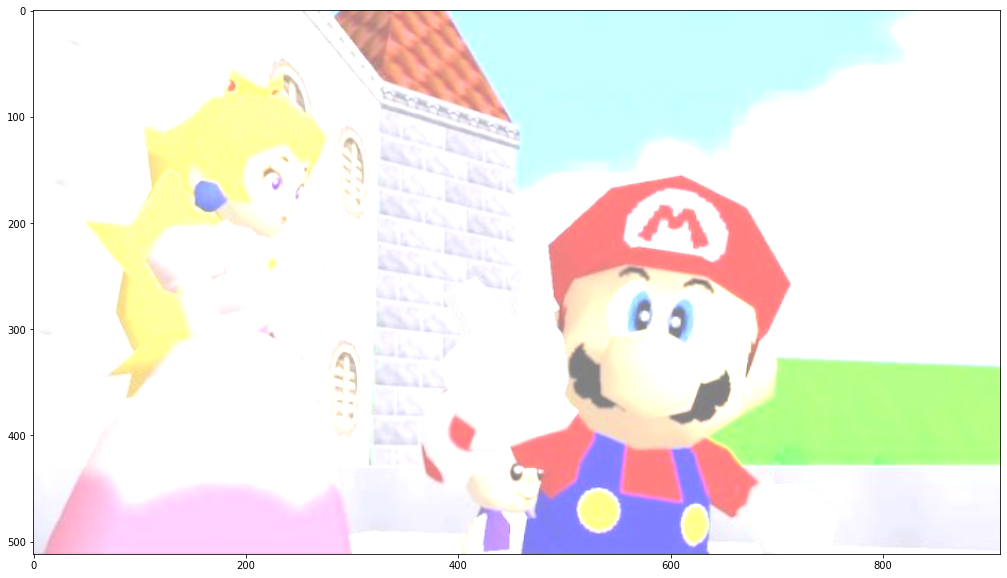

In [ ]:
# Ajuste de brilho de imagem

# Execução da transformação na imagem
brightness_mario_image = np.clip(mario_image + brightness_gain.value * np.ones((np.size(mario_image, axis=0), np.size(mario_image, axis=1), 3)), a_min=0, a_max=1)

# Exibe a imagem pelo MatPlotLib
plt.imshow(brightness_mario_image)

### Ajuste de contraste de imagem

In [ ]:
# Seleção da intensidade do ajuste de contraste

# Cria sliders para seleção do ganho do ajuste de contraste
constrast_gain = widgets.FloatSlider(value=0, min=-1.0, max=1.0, step=0.05, description='Contraste')

# Exibe os sliders do ajuste de contraste
display(constrast_gain)

FloatSlider(value=0.0, description='Contraste', max=1.0, min=-1.0, step=0.05)

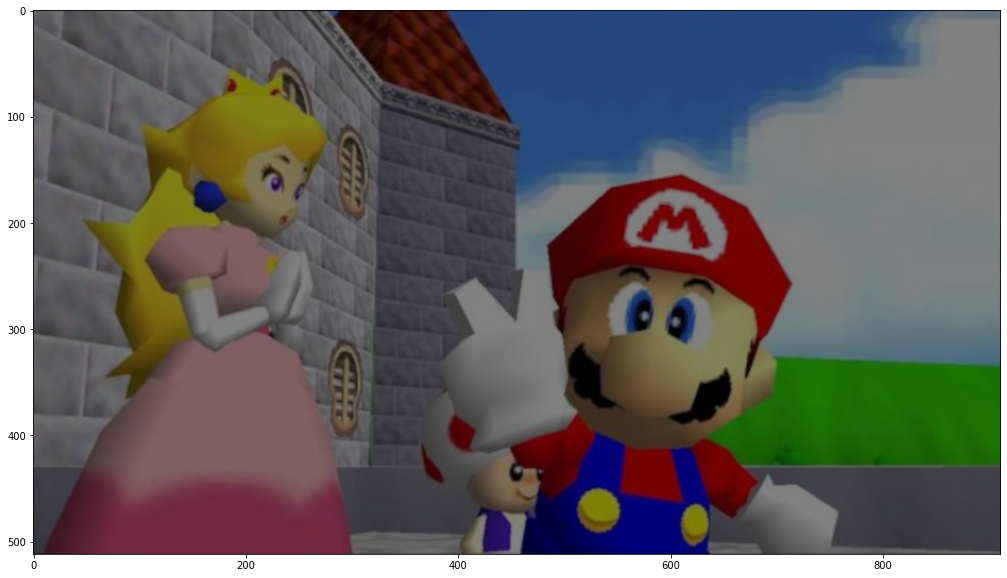

In [ ]:
# Ajuste de contraste de imagem

# Execução da transformação na imagem
constrast_mario_image = np.clip(np.tan(np.pi*(1.0 + constrast_gain.value)/4)*mario_image, 0, 1)

# Exibe a imagem pelo MatPlotLib
plt.imshow(constrast_mario_image)

### Redimensionamento de imagens

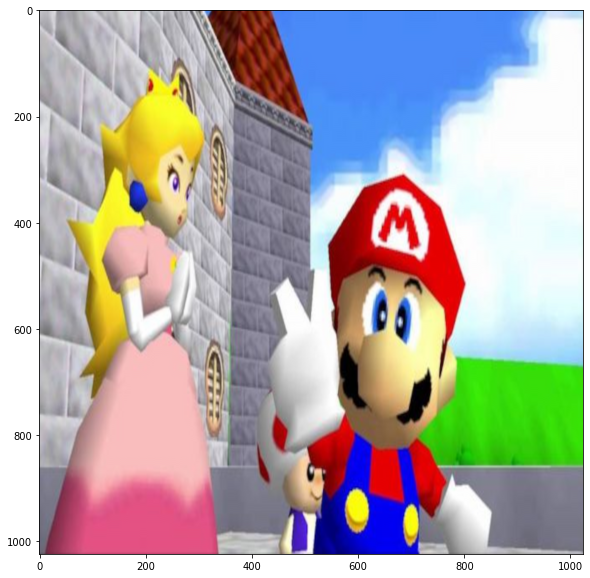

In [ ]:
# Redimensionamento de imagens

# Parâmetros do redimensionamento
largura_desejada = 1024
altura_desejada = 1024
algoritmo_interpolador = 'cubic' # 'linear', 'cubic', 'quintic'

# Criação de vetores auxiliares para interpolação
vetor_altura_original = np.arange(0, np.size(mario_image, axis=0))
vetor_largura_original = np.arange(0, np.size(mario_image, axis=1))
vetor_altura_novo = np.linspace(0, np.size(mario_image, axis=0) - 1, num=altura_desejada)
vetor_largura_novo = np.linspace(0, np.size(mario_image, axis=1) - 1, num=largura_desejada)

# Criação das funções de interpolação para cada canal
red_channel_function = interp2d(vetor_largura_original, vetor_altura_original, mario_image[:, :, 0], kind=algoritmo_interpolador)
green_channel_function = interp2d(vetor_largura_original, vetor_altura_original, mario_image[:, :, 1], kind=algoritmo_interpolador)
blue_channel_function = interp2d(vetor_largura_original, vetor_altura_original, mario_image[:, :, 2], kind=algoritmo_interpolador)

# Geração dos canais de cores redimensionados
red_resized_mario_image = np.clip(red_channel_function(vetor_largura_novo, vetor_altura_novo), a_min=0, a_max=1)
green_resized_mario_image = np.clip(green_channel_function(vetor_largura_novo, vetor_altura_novo), a_min=0, a_max=1)
blue_resized_mario_image = np.clip(blue_channel_function(vetor_largura_novo, vetor_altura_novo), a_min=0, a_max=1)

# Criação da imagem redimensionada
resized_mario_image = np.dstack((red_resized_mario_image, green_resized_mario_image, blue_resized_mario_image))

# Exibe a imagem pelo MatPlotLib
plt.imshow(resized_mario_image)

In [ ]:
# Exportação da imagem redimensionada
plt.imsave(filepath + 'ResizedSuperMario64.png', resized_mario_image, format='png')